In [40]:
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import seaborn as sb


In [41]:
data = pd.read_csv('internship_train.csv', sep = ',')

In [42]:
data.shape

(90000, 54)

In [43]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [44]:
data.corr()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,1.000000,0.002009,0.001170,0.002957,-0.003764,-0.007362,0.007855,0.007174,0.008011,0.002339,...,-4.142468e-03,-6.524791e-03,0.003532,0.000310,-0.002639,0.004795,0.000287,-0.001647,-0.003612,0.002427
1,0.002009,1.000000,-0.001849,-0.004653,-0.002433,-0.002037,0.004181,0.005790,0.004095,0.002592,...,-2.874705e-03,-2.679358e-03,0.001402,-0.007900,-0.004497,0.002015,0.003119,0.006038,-0.003173,-0.005545
2,0.001170,-0.001849,1.000000,-0.000775,0.003082,-0.002161,0.002296,-0.000299,0.001983,0.005753,...,1.091757e-03,-5.881274e-04,0.000643,0.003106,0.001611,-0.001444,0.001006,-0.001753,0.002812,0.001003
3,0.002957,-0.004653,-0.000775,1.000000,-0.003623,-0.001038,0.000223,-0.004290,0.000966,0.000202,...,-5.875674e-03,4.776979e-03,0.001334,0.000528,0.006892,0.002790,0.002082,0.000373,0.002534,0.002807
4,-0.003764,-0.002433,0.003082,-0.003623,1.000000,-0.000992,0.005602,-0.004459,0.004763,-0.000778,...,-1.412970e-03,6.178204e-03,-0.000873,-0.002625,-0.001883,0.002884,-0.000702,0.001067,-0.002388,-0.001300
5,-0.007362,-0.002037,-0.002161,-0.001038,-0.000992,1.000000,-0.003869,-0.001455,-0.002289,0.004740,...,-1.159929e-03,-5.225882e-03,-0.000776,-0.000087,-0.004682,0.000988,0.004735,-0.004100,0.004946,-0.002125
6,0.007855,0.004181,0.002296,0.000223,0.005602,-0.003869,1.000000,-0.002051,0.940016,-0.007185,...,5.795666e-04,-3.255019e-05,0.005084,-0.002972,-0.002300,0.003611,0.001542,-0.000944,0.002867,0.000666
7,0.007174,0.005790,-0.000299,-0.004290,-0.004459,-0.001455,-0.002051,1.000000,0.000779,-0.007187,...,-5.102514e-03,2.936529e-03,0.003277,-0.001273,-0.000669,0.001930,0.001085,0.008363,0.001724,0.012103
8,0.008011,0.004095,0.001983,0.000966,0.004763,-0.002289,0.940016,0.000779,1.000000,-0.007370,...,3.567263e-04,-1.795987e-03,0.006837,-0.003748,-0.002903,0.004119,0.000960,0.000786,0.001725,0.000347
9,0.002339,0.002592,0.005753,0.000202,-0.000778,0.004740,-0.007185,-0.007187,-0.007370,1.000000,...,1.202068e-03,1.417241e-03,-0.002239,0.002636,0.004146,0.001255,-0.000016,-0.003785,-0.003467,0.001504


In [45]:
pd.isnull(data).sum()


0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        0
41        0
42        0
43        0
44        0
45        0
46        0
47        0
48        0
49        0
50        0
51        0
52        0
target    0
dtype: int64

In [46]:
X=data.drop(['target'], axis=1)
y=data['target']

In [50]:
#X = preprocessing.normalize(X)
X

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,10.125020,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,10.584802,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,10.273114,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,6.885179,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,11.162686,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,328,44,320,364,7,73,4.898979,0.563878,1,315,...,5.252173,0.266362,6.185887,7.716837,10.144664,1.711649,3.849704,12.401903,14.195540,2.371207
89996,217,472,174,327,255,389,-3.605551,0.861690,0,144,...,14.736929,5.147059,4.209660,14.482770,1.375031,6.386263,10.107582,12.637902,6.576331,6.863238
89997,189,406,213,57,494,190,6.164414,0.633704,1,221,...,7.296410,14.902807,2.886534,8.683168,4.522339,1.556421,10.971184,7.792226,8.422623,3.041409
89998,418,478,163,35,390,77,-3.605551,0.687309,0,289,...,13.943818,12.743029,2.525611,11.050145,6.589943,12.622192,10.596839,0.647584,8.746364,1.246682


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [52]:
base_estimator = DecisionTreeRegressor(random_state=0, max_depth=10, max_features= 0.9 )

In [53]:
regr = AdaBoostRegressor(base_estimator = base_estimator ,random_state=0, n_estimators=100, learning_rate = 0.3).fit(X_train,y_train)

In [12]:
regr.get_params(deep=True)


{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__criterion': 'squared_error',
 'base_estimator__max_depth': 10,
 'base_estimator__max_features': 0.9,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': 0,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeRegressor(max_depth=10, max_features=0.9, random_state=0),
 'learning_rate': 0.3,
 'loss': 'linear',
 'n_estimators': 100,
 'random_state': 0}

In [54]:
regr.score(X_train,y_train)

0.9999964835761854

In [55]:
y_predict=regr.predict(X_test)

In [38]:
y_predict

array([32.67219436, 76.88947541, 70.72821603, ..., 25.54380563,
        4.70337603, 69.32291206])

In [56]:
mean_squared_error(y_test, y_predict, squared=False)

0.05571788933944534

In [ ]:
0.013082720955576574
0.006618936703377127
0.002306327141662202

In [20]:
cross_val_score(regr, X_test, y_test)

array([0.98849353, 0.98895987, 0.99050859, 0.98980199, 0.98875429])

In [19]:
params ={'max_depth' : [10, 11, 12], 'max_features':[0.9,1],'ccp_alpha':[0,1,2] }
grid = GridSearchCV(base_estimator, params, cv=5)
grid.fit(X, y)
print(grid.best_score_)
print(grid.best_params_)

0.9855552591486682
{'ccp_alpha': 0, 'max_depth': 12, 'max_features': 0.9}


Графік залишків:

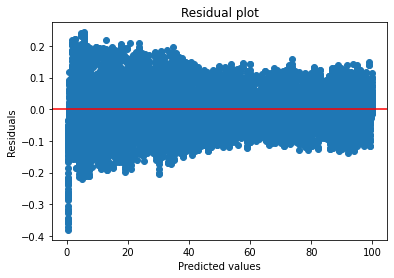

In [57]:
residuals = y_test-y_predict
plt.scatter(y_predict, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

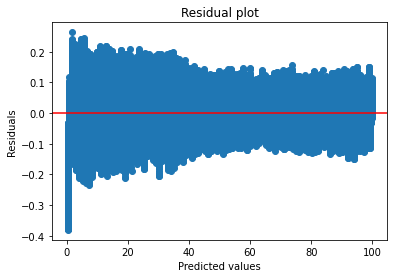

In [58]:
y_pred = regr.predict(X)
residuals = y-y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

In [59]:
test_data = pd.read_csv('internship_hidden_test.csv', sep = ',')

In [60]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,259,388,402,340,156,382,3.316625,0.218760,1,164,...,7.163474,10.227235,0.889111,9.190222,4.670908,0.931525,7.634177,0.158196,13.432551,2.511191
1,441,192,381,421,452,123,-8.888194,0.700228,0,349,...,10.619064,9.339161,4.221861,0.595563,13.865748,0.328453,11.507599,9.107966,1.302407,11.105604
2,83,129,107,156,247,191,2.645751,0.494556,1,297,...,1.819890,10.670237,10.350867,5.134417,5.898995,8.374986,4.638049,3.160023,2.243799,5.073030
3,183,438,191,116,491,403,-6.164414,0.511117,0,272,...,4.168135,12.782579,0.513072,0.321295,11.334062,11.735511,1.911520,8.365676,4.877288,11.601819
4,449,156,310,188,279,465,8.000000,0.756416,1,90,...,7.908122,1.140498,14.165074,7.688796,5.079241,8.152186,1.680403,13.215111,5.823109,1.038015


In [61]:
predictions = regr.predict(test_data)

In [62]:
predictions_df = pd.DataFrame(predictions, columns=["Prediction"])
predictions_df.to_csv("predictions.csv", index=False)